In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [6]:
len(df)

10000

In [7]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                10
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [8]:
df = df.fillna(df["Age"].mean())
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
(df["Exited"] == 1).sum()

2037

In [10]:
(df["Exited"] == 0).sum()

7963

In [11]:
df.dtypes #In neural network float64 is used

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
#Univarient analysis

target_name = "Exited"
particular_column = "Geography"

Text(0.5, 1.0, 'The Count Plot of Geography respect to Exited')

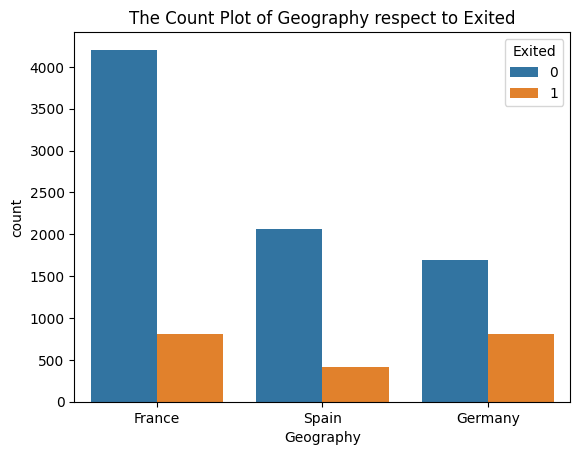

In [13]:
# Create a count plot
sns.countplot( data = df , x = particular_column, hue = target_name)
plt.title(f'The Count Plot of {particular_column} respect to {target_name}')

In [14]:
particular_column = "Gender"

Text(0.5, 1.0, 'The Count Plot of Gender respect to Exited')

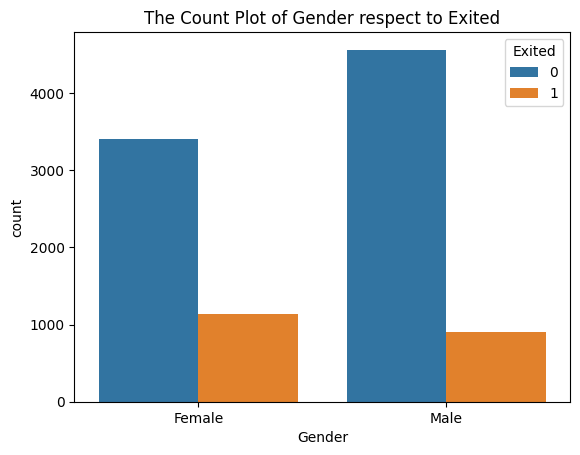

In [15]:
# Create a count plot
sns.countplot( data = df , x = particular_column, hue = target_name)
plt.title(f'The Count Plot of {particular_column} respect to {target_name}')

In [16]:
#Bivarient analysis
df_local1 = df[["Geography", "Gender", "Exited"]]

In [17]:
df_local1.head(9)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0
5,Spain,Male,1
6,France,Male,0
7,Germany,Female,1
8,France,Male,0


<AxesSubplot:xlabel='Gender', ylabel='Count'>

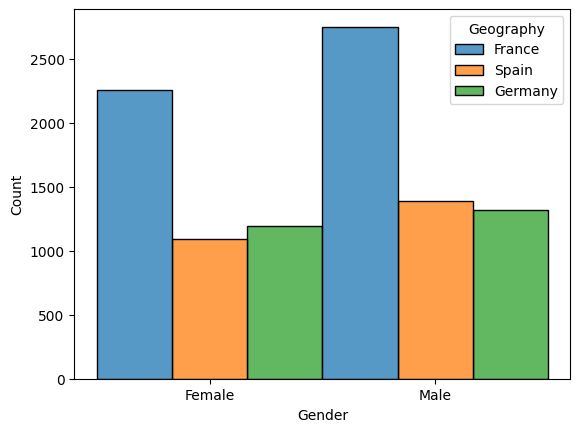

In [18]:
sns.histplot(data=df_local1, x="Gender", hue = "Geography", multiple = 'dodge' )

In [19]:
df_local2 = df_local1.loc[df_local1["Exited"] == 1]

In [20]:
df_local2.head()

,Geography,Gender,Exited
0,France,Female,1
2,France,Female,1
5,Spain,Male,1
7,Germany,Female,1
16,Germany,Male,1


<AxesSubplot:xlabel='Gender', ylabel='Count'>

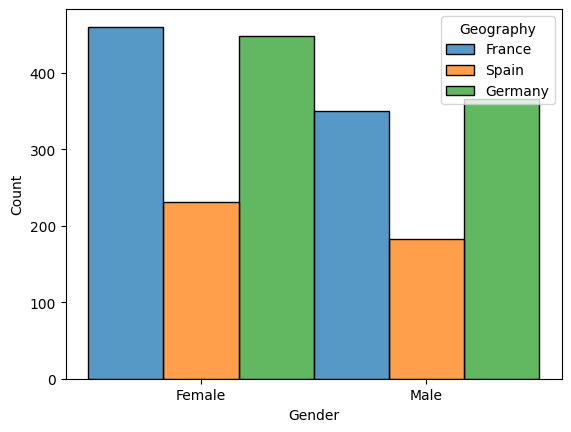

In [21]:
sns.histplot(data=df_local2, x="Gender", hue = "Geography", multiple = 'dodge' )

In [22]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000822,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009982,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.004426,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000822,0.009982,-0.004426,1.000000,-0.010267,0.028253,-0.030102,-0.012124,0.085355,-0.006875,0.285535
Tenure,-0.006495,-0.014883,0.000842,-0.010267,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028253,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030102,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.012124,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085355,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.006875,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

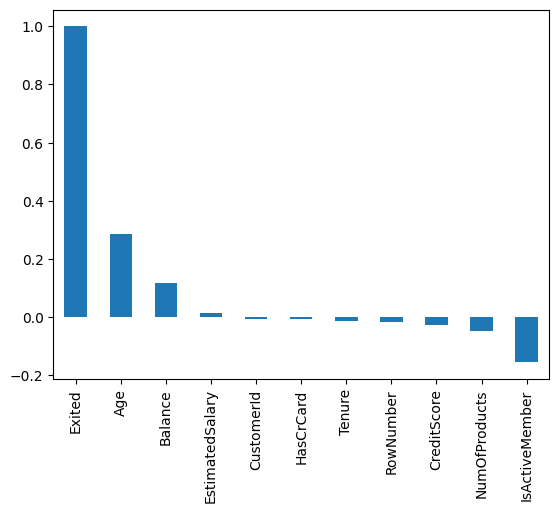

In [23]:
df.corr()["Exited"].sort_values(ascending=False ).plot(kind = "bar")

<AxesSubplot:>

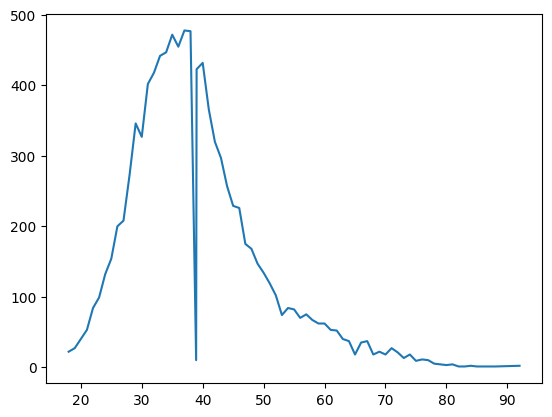

In [24]:
df["Age"].value_counts().sort_index().plot(kind = "line")

In [25]:
df_3 = df.loc[df["Exited"] == 1]
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,38.924424,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.000000,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

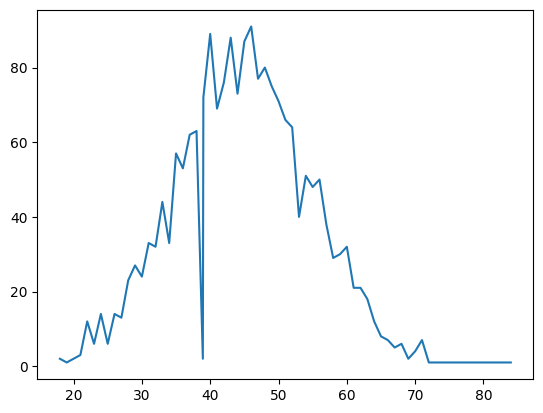

In [26]:
df_3["Age"].value_counts().sort_index().plot(kind = "line")